<a href="https://colab.research.google.com/github/Monoxido45/Bike_sharing_AM/blob/main/trabalho_1_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pacotes para pegar os dados da net
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

# pacotes importados
import numpy as np
import pandas as pd

# para os graficos
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

Montando o drive e importando os dados de bicicleta:


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# lendo os dados
#bike_df = pd.read_csv('/content/gdrive/My Drive/AM_trabalhos/hour.csv', sep = ",")
#print(bike_df)
#bike_tudo = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip')
#print(df)

link_do_repo = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

r = urllib2.urlopen(link_do_repo).read()
file = ZipFile(BytesIO(r))
dados_csv = file.open("hour.csv")
bike_df = pd.read_csv(dados_csv)

bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Analisando as informações sumarizadas do banco de dados, verificando se há valores faltantes para cada variável:

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Com cada variável sendo:
1.  **instant** = indice de registro
2.  **dteday** = data em D/M/A
3.  **season** = estação do ano (1:inverno, 2:primavera, 3:verão, 4:outono)
4.  **yr** = ano (0:2011, 1:2012)
5.  **mnth** =  mês (1 até 12)
6.  **hr** = hora (0 até 23)
7.  **holiday** = dia é feriado ou não
8.  **weekday** = dia da semana
9.  **workinday** = se é dia útil (1) ou não (0)
10. **wheathersit** = tempo do dia, com os níveis:
    *   1: Tempo limpo, poucas nuvens, parcialmente nebuloso
    *   2: Névoa + nebuloso, Névoa + algumas nuvens, Névoa + poucas nuvens, Névoa
    *   3: Leve neve, Leve chuva e tempestade com nuvens espalhadas, Chuva leve e nuvens espalhadas
    *   4: Chuva pesada acompanhada de granizo, tempestade e névoa ou neve e nevoeiro
11. **temp**: Temperatura em celsius normalizada.
12. **atemp**: Sensação térmica em celsius normalizada.
13. **hum**: Humidade normalizada, dividida por 100.
14. **windspeed**: Velocidade do vento normalizada, divida por 67.
15. **casual**: Contagem de usuários casuais
16. **registered**: contagarem de usuários registrados
17. **cnt**: Contagem do total de biciletas alugadas, tanto por usuários casuais quanto registrados

Podemos inicialmente explorar os dados e realizar analises descritivas breves. É interessante notar que as únicas variáveis quantitativas são a temperatura, sensação térmica, humidade, velocidade do vento e as contagens de bicicletas alugadas. Podemos inicialmente verificar e analisar a variável resposta de interesse, averiguando sua distribuição de forma univariada e o número médio de bicicletas alugadas por dia:

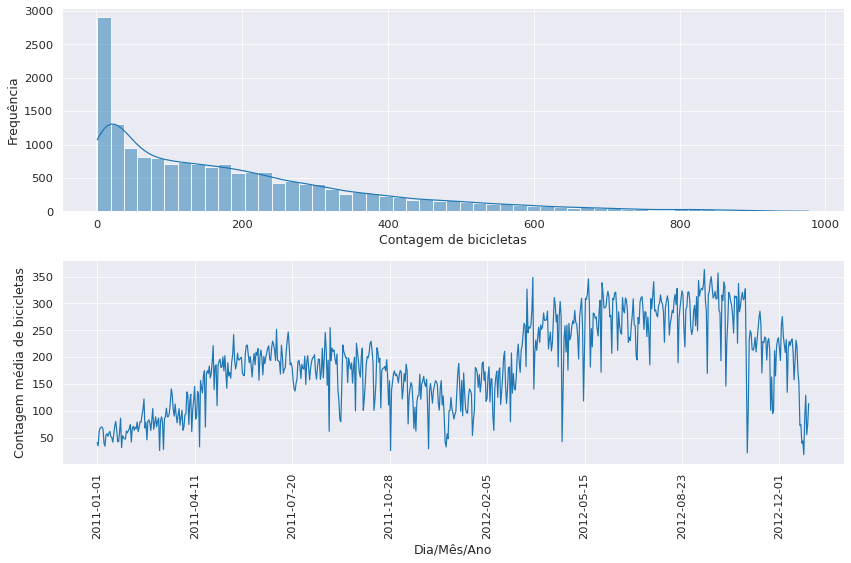

In [ ]:
# estilo usado
sns.set_context("paper", font_scale= 1.3)
sns.set_style("darkgrid")
sns.color_palette("Set1")

# contagem média por dia/mes/ano
series_cnt = bike_df.groupby('dteday')['cnt'].mean()
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1)
# histograma acompanhado de uma estimativa de densidade por kernel
sns.histplot(data = bike_df, x = "cnt", kde = True, color = "tab:blue")
plt.ylabel("Frequência")
plt.xlabel("Contagem de bicicletas")

plt.subplot(2, 1, 2)
series_cnt.plot(color = "tab:blue")
plt.xlabel("Dia/Mês/Ano")
plt.xticks(rotation='vertical')
plt.ylabel("Contagem média de bicicletas")

plt.tight_layout()
plt.show()

Vemos pelo gráfico acima que a maior parte da contagem de bicicletas é zero ou próximo de zero, o que faz sentido visto que durante certas horas do dia teremos pouco se não nenhum aluguel de bicicletas. Em outro aspecto, vemos que do ano de 2011 para o ano de 2012 houve um aumento do número de bicicletas alugadas por dia com maior crescimento de 05/2012 para 08/2012, havendo novamente um decrescimento mais ao fim do ano. Assim, após tal breve analise, vendo que não há nenhum valor absurdo ou ruído, seguimos para uma analise das variáveis quantitativas de forma conjunta, tendo a matriz de correlação de spearman:

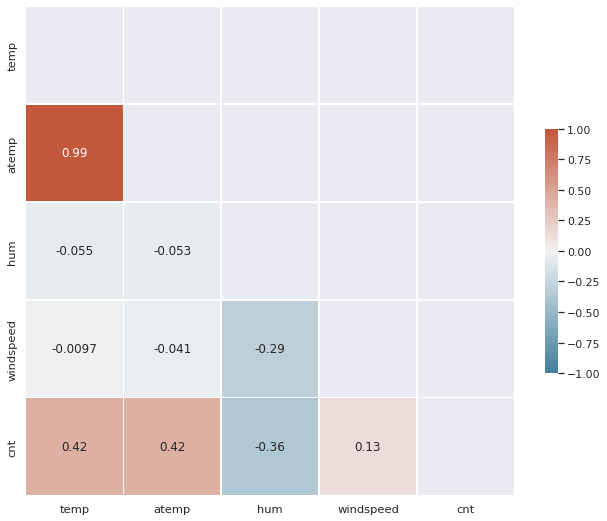

In [ ]:
quant_vars = bike_df.columns[[10, 11, 12, 13, 16]]
cor = bike_df[quant_vars].corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set_theme(style="white")
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=1, center=0, vmin = -1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

Tal que temos os gráficos de dispersão entre a variável de contagem contra as variáveis:

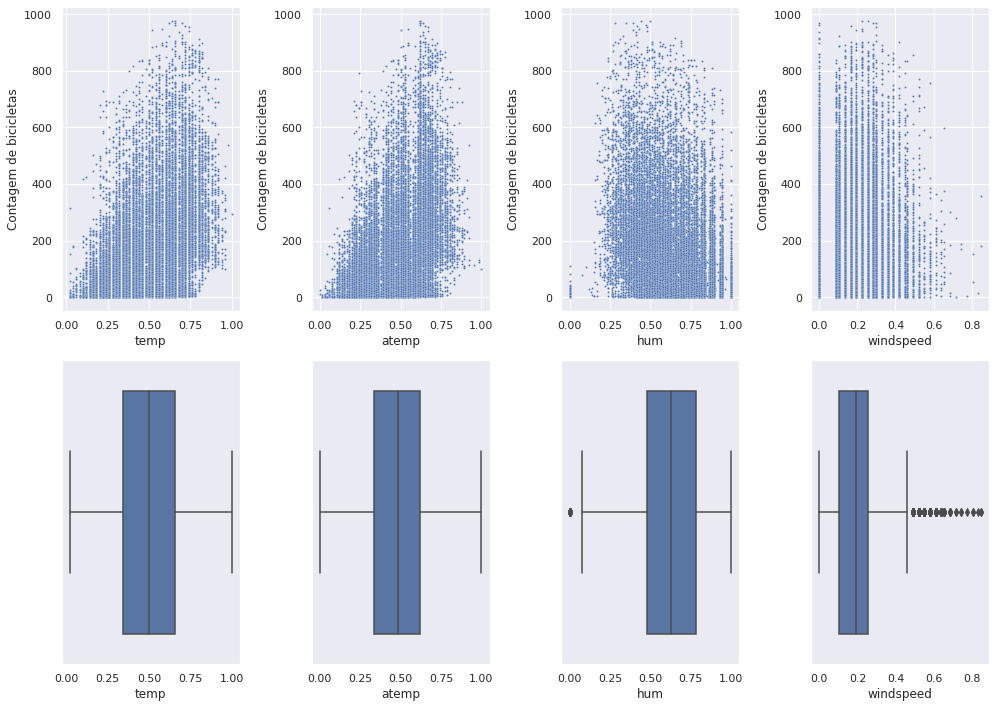

In [ ]:
plt.figure(figsize = (14, 10))
j = 1
for i in range(0, len(quant_vars) - 1):
  sns.set_style("darkgrid")
  plt.subplot(2, 4, j)
  sns.scatterplot(data = bike_df, x = quant_vars[i], y = "cnt", s = 4)
  plt.ylabel("Contagem de bicicletas")

  sns.set_style("dark")
  plt.subplot(2, 4, j + 4)
  sns.boxplot(data = bike_df, x = quant_vars[i])
  j += 1
plt.tight_layout()
plt.show()

In [ ]:
cat_vars = bike_df.columns[2:10]
some_cat_vars = bike_df.columns[[2, 3, 6, 7, 8, 9]]

Analisando as contagens

In [ ]:
for i in range(0, len(cat_vars)):
  print(bike_df[cat_vars[i]].value_counts())

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
1    8734
0    8645
Name: yr, dtype: int64
7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64
16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64
1    11865
0     5514
Name: workingday, dtype: int64
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64


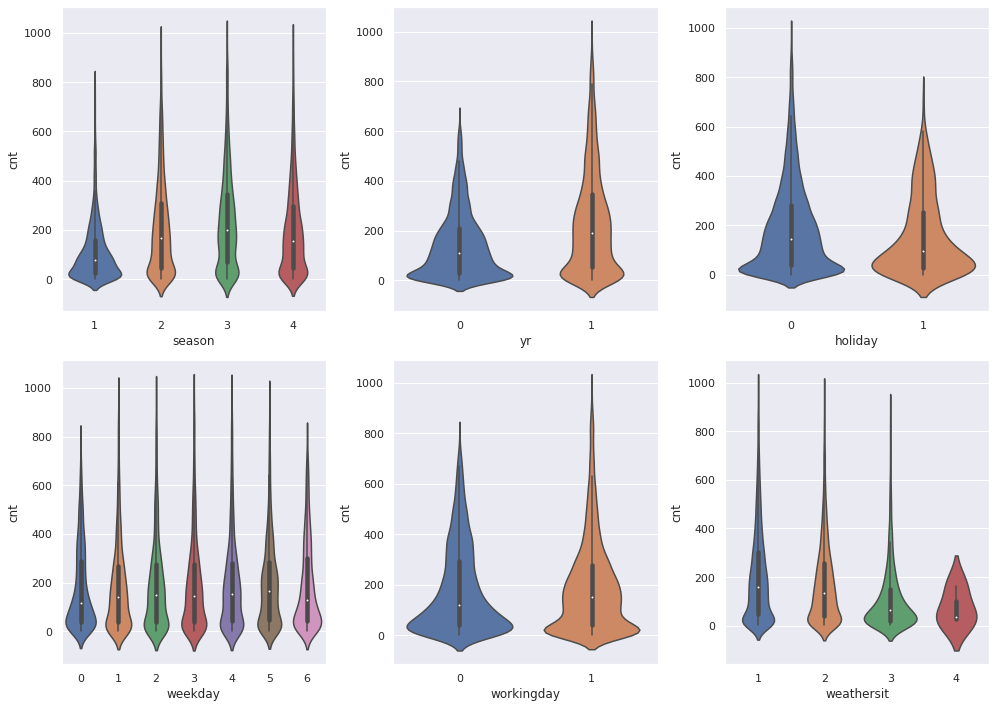

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (14, 10))
j = 1
for i in range(0, len(some_cat_vars)):
  plt.subplot(2, 3, j)
  sns.violinplot(data = bike_df, x = some_cat_vars[i], y = "cnt")
  j += 1

plt.tight_layout()
plt.show()

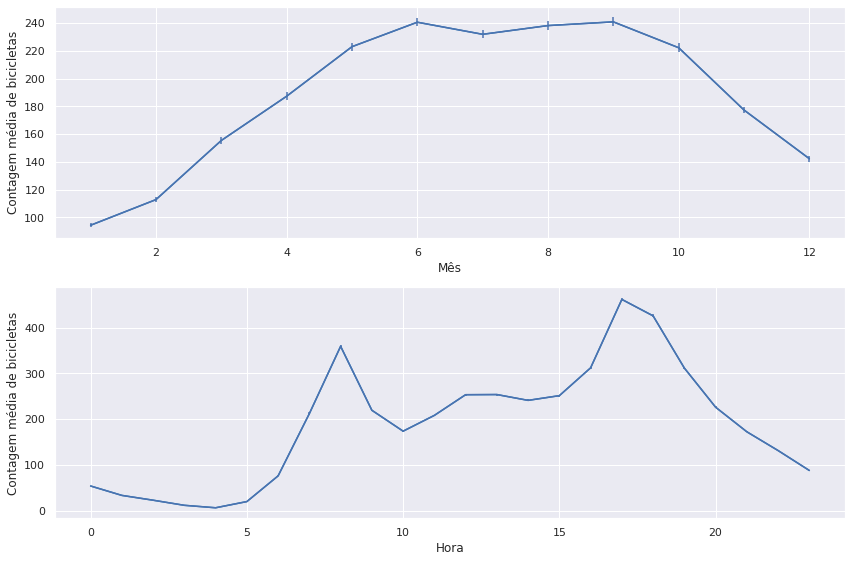

In [ ]:
months_hour = bike_df.columns[[4,5]]
sns.set_style("darkgrid")
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1)
# contagem media por mês
cnt_means_mnth = bike_df.groupby('mnth')['cnt'].mean().array.to_numpy()
# erro padrao associado a media
cnt_stds_mnth = 2*bike_df.groupby('mnth')['cnt'].std().array.to_numpy()/(np.sqrt(bike_df.shape[0]))
plt.plot(bike_df['mnth'].unique(), cnt_means_mnth, color = "tab:blue")
plt.errorbar(bike_df['mnth'].unique(),
            cnt_means_mnth,
            yerr = cnt_stds_mnth,
            fmt='-')

plt.xlabel("Mês")
plt.ylabel("Contagem média de bicicletas")

plt.subplot(2, 1, 2)
# contagem media por hora
cnt_means_hr = bike_df.groupby('hr')['cnt'].mean().array
# erro padrao associado a media
cnt_stds_hr = 2*bike_df.groupby('hr')['cnt'].std().array.to_numpy()/(np.sqrt(bike_df.shape[0]))

plt.plot(bike_df['hr'].unique(), cnt_means_hr.to_numpy(),color = "tab:blue")
plt.errorbar(bike_df['hr'].unique(),
            cnt_means_hr,
            yerr = cnt_stds_hr,
            fmt='-')

plt.xlabel("Hora")
plt.ylabel("Contagem média de bicicletas")

plt.tight_layout()
plt.show()

# Modelagem e predições:

Retirando primeiramente algumas variáveis:

In [ ]:
# retirando atemp, instant, dteday, casual e registered
bike_clean = bike_df.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis = 1)
bike_clean.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


Decodificando as variáveis qualitativas por one hot encoding:

In [ ]:
# selecionando o nome das colunas continuas e categoricas
cols_ind = (bike_clean.select_dtypes(include='int64').drop(['cnt'], axis = 1)
.columns)

cols_num = (bike_clean.select_dtypes(include = "float64")).columns

# para normalizar e decodificar
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# escalonamento das variaveis reservado para apos divisao em treino e teste
numeric_transformer = StandardScaler()

# one hot encoding tirando um dos fatores para nao ter
categorical_transformer = OneHotEncoder(drop = "first", sparse = False)

encoded_columns = categorical_transformer.fit_transform(bike_clean[cols_ind])

# X e y separados:
X = np.concatenate([encoded_columns, bike_clean[cols_num].values], axis = 1)
y = bike_clean['cnt'].values
X

array([[0.    , 0.    , 0.    , ..., 0.24  , 0.81  , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.22  , 0.8   , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.22  , 0.8   , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.26  , 0.6   , 0.1642],
       [0.    , 0.    , 0.    , ..., 0.26  , 0.56  , 0.1343],
       [0.    , 0.    , 0.    , ..., 0.26  , 0.65  , 0.1343]])

In [ ]:
# divisao dos dados em treinamento e teste
# 0.2 para teste e 0.8 para o treino, tendo mais que o suficiente 
# de teste para uma boa estimação do risco
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# tamanhos do conjunto de treinamento e teste
print(X_train.shape)
print(X_test.shape)
p = X_train.shape[1]

(13903, 52)
(3476, 52)


AJustando diferentes modelos e tunando se necessário (usaremos como score o R2 ajustado e o erro médio absoluto):


*   Regressão linear multipla:
Não há necessidade de escalonamento das variáveis



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
# regressao linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_preds = lin_reg.predict(X_test)

# score r2 e erro absoluto medio
mae_lin_reg = mean_absolute_error(y_test, lin_reg_preds)

def adjusted_r2(y_true, y_pred, X_test):
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_true, y_pred)
  adj = 1- ((1 - r2)*(n - 1)/(n - p -1))
  return(adj)

print(mae_lin_reg)
print(adjusted_r2(y_test, lin_reg_preds, X_test))

74.0969054181688
0.6761739151726258


Vemos pelo erro médio absoluto um ajuste não muito bom juntamente com um R2 ajustado também não tão adequado, tendo o gráfico de valores observados contra preditos:

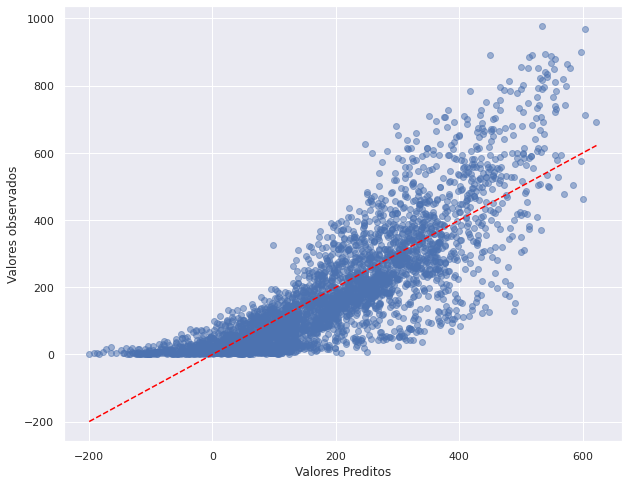

In [ ]:
# linha identidade
x_vals = np.linspace(min(lin_reg_preds), max(lin_reg_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(lin_reg_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.show()


Vemos que algumas predições são negativas quando o domínio do problema é estritamente positivo, tendo vários zeros. Se checarmos os coeficientes, teremos:

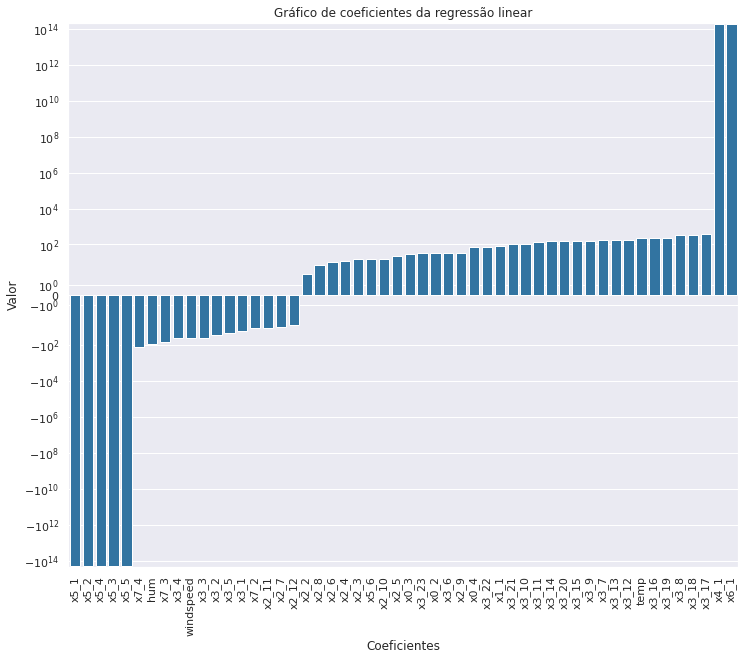

In [ ]:
coefs_names = np.concatenate((categorical_transformer.get_feature_names(), cols_num), axis = None)
order = lin_reg.coef_.argsort()

plt.figure(figsize = (12, 10))
sns.barplot(x = coefs_names[order], y = lin_reg.coef_[order], color = "tab:blue")
plt.xticks(rotation = 90)
plt.xlabel("Coeficientes")
plt.ylabel("Valor")
plt.yscale('symlog')
plt.title("Gráfico de coeficientes da regressão linear")
plt.show()

Vemos coeficientes muito negativos e muito positivos, com altos valores em certas covariáveis.

Assim, como solução desse problema, podemos adicionar uma restrição no modelo de regressão linear, de forma que os coeficientes da regressão $\hat{\beta}_j$ sejem todos positivos e logo $\hat{y}$ também o seja:

In [ ]:
import sklearn
# atualizando sklearn se necessario
# porque geralmente a versao do colab eh 0.22
if sklearn.__version__ == "0.22.2.post1":
  !pip uninstall scikit-learn -y
  !pip install -U scikit-learn

# regressao linear

lin_reg_pos = LinearRegression(positive = True, fit_intercept = False)
lin_reg_pos.fit(X_train, y_train)

lin_reg_pos_preds = lin_reg_pos.predict(X_test)

# score r2 e erro absoluto medio
mae_lin_reg_pos = mean_absolute_error(y_test, lin_reg_pos_preds)

def adjusted_r2(y_true, y_pred, X_test):
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_true, y_pred)
  adj = 1- ((1 - r2)*(n - 1)/(n - p -1))
  return(adj)

print(mae_lin_reg_pos)
print(adjusted_r2(y_test, lin_reg_pos_preds, X_test))

83.59432679668134
0.5852568505785831


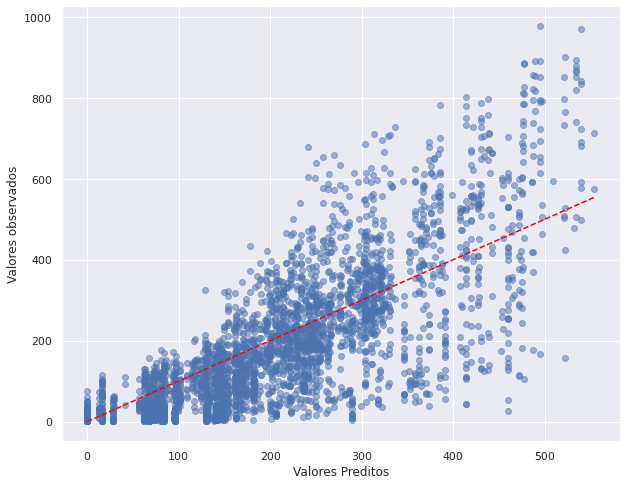

In [ ]:
# linha identidade
x_vals = np.linspace(min(lin_reg_pos_preds), max(lin_reg_pos_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(lin_reg_pos_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.show()

# nomes das variáveis

Obtemos um ajuste pior que o anterior. Assim, talvez o modelos de regressão linear não seja tão bom. Podemos recorrer a métodos não paramétricos.


*   KNN: Primeiramente, tunaremos o número de vizinhos $k$:



In [ ]:
# grid para k
n_neighbors = list(range(1, 85))
hyperpar = dict(n_neighbors = n_neighbors)

# escalonando
X_train_scaled = numeric_transformer.fit_transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
# objeto do knn
knn_tun = KNeighborsRegressor()
# grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_tun, hyperpar, cv = 10, scoring = "neg_mean_absolute_error")

# fitando e achando o melhor modelo
best_model = clf.fit(X_train_scaled, y_train)

# melhor k
print('Melhor k:', best_model.best_estimator_.get_params()['n_neighbors'])

Melhor k: 2


In [ ]:
historic = pd.DataFrame(best_model.cv_results_)
historic.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002595,0.000157,0.224613,0.022527,1,{'n_neighbors': 1},-52.472322,-55.804457,-57.714594,-54.028777,-55.425180,-57.738849,-55.987050,-56.476978,-56.278417,-55.037410,-55.696403,1.515664,7
1,0.002347,0.000044,0.250804,0.006580,2,{'n_neighbors': 2},-51.105679,-54.238677,-53.487779,-51.657554,-52.612950,-55.540647,-55.239568,-55.078777,-54.247482,-52.144604,-53.535372,1.500874,1
2,0.002524,0.000629,0.284745,0.005831,3,{'n_neighbors': 3},-52.686556,-54.951354,-55.824587,-55.167626,-53.472182,-56.697842,-56.526139,-55.474580,-56.727818,-54.956115,-55.248480,1.272930,3
3,0.002369,0.000127,0.359565,0.008854,4,{'n_neighbors': 4},-53.554817,-54.805536,-56.425773,-55.680935,-53.894784,-57.380396,-57.830576,-56.635432,-58.502158,-55.887230,-56.059764,1.549798,10
4,0.002316,0.000025,0.360793,0.014056,5,{'n_neighbors': 5},-54.124371,-55.407477,-57.316463,-54.943741,-55.526043,-57.485612,-59.187770,-58.130791,-58.960719,-55.796115,-56.687910,1.671134,14


Média e std do score plotados:

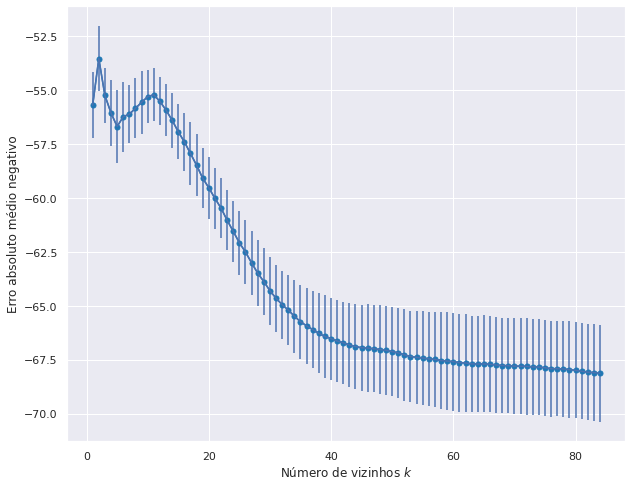

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(historic['param_n_neighbors'], historic['mean_test_score'],color = "tab:blue",
         marker = '.', markersize = 10)
plt.errorbar(historic['param_n_neighbors'],
            historic['mean_test_score'],
            yerr = historic['std_test_score'],
            fmt = '-')
plt.xlabel(r"Número de vizinhos $k$")
plt.ylabel(r"Erro absoluto médio negativo")
plt.show()

2 é o melhor número de vizinhos, tendo:

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train_scaled, y_train)

X_test_scaled = numeric_transformer.transform(X_test)
knn_preds = knn.predict(X_test_scaled)

# score r2 e erro absoluto medio
mae_knn_reg = mean_absolute_error(y_test, knn_preds)

print(mae_knn_reg)
print(adjusted_r2(y_test, knn_preds, X_test_scaled))

52.20368239355581
0.7739272764386818


Obtemos um ótimo ajuste no KNN em comparação ao modelo linear, tendo o seguinte gráfico de 

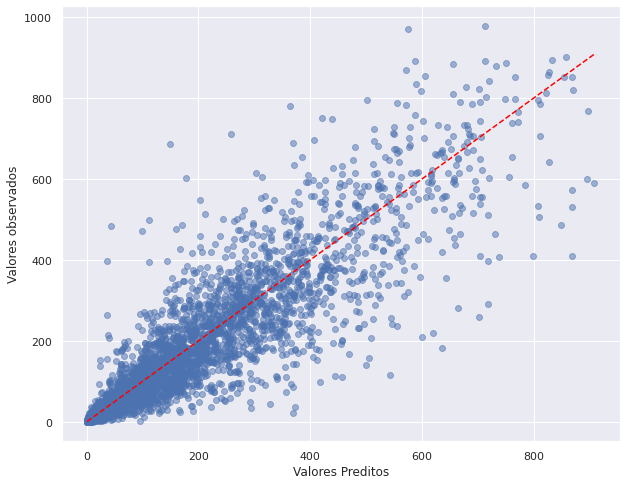

In [ ]:
# linha identidade
x_vals = np.linspace(min(knn_preds), max(knn_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(knn_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.show()

Obtemos um ajuste relativamente bom do KNN, porém pode-se testar ainda, fixar $k = 2$ e variar o hiper-parâmetro $p$ nas distâncias:

In [ ]:
# fixando k e variando p
p = list(range(1, 10))
hyperpar = dict(p = p)

# escalonando
X_train_scaled = numeric_transformer.fit_transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
# objeto do knn
knn_tun = KNeighborsRegressor()
# grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_tun, hyperpar, cv = 10, scoring = "neg_mean_absolute_error")

# fitando e achando o melhor modelo
best_model = clf.fit(X_train_scaled, y_train)

# melhor k
print('Melhor p com k = 2:', best_model.best_estimator_.get_params()['p'])

Melhor p com k = 2: 1


Mesmos gráficos do $k$ para o $p$

In [ ]:
historic = pd.DataFrame(best_model.cv_results_)
historic.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002380,0.000081,0.811157,0.005947,1,{'p': 1},-50.560316,-51.708267,-52.018116,-52.030072,-50.343309,-53.391367,-53.720432,-53.205899,-55.347050,-51.468201,-52.379303,1.459468,1
1,0.002344,0.000034,0.358675,0.010079,2,{'p': 2},-54.124371,-55.407477,-57.316463,-54.943741,-55.526043,-57.485612,-59.187770,-58.130791,-58.960719,-55.796115,-56.687910,1.671134,2
2,0.002346,0.000027,27.099169,0.034608,3,{'p': 3},-58.302948,-59.446873,-62.069878,-58.820719,-58.239856,-62.340719,-63.024748,-62.052518,-62.085755,-59.266619,-60.565063,1.802645,3
3,0.002422,0.000145,26.834333,0.021266,4,{'p': 4},-59.309561,-60.809921,-63.399712,-60.218273,-59.428777,-63.448489,-64.485180,-63.094532,-62.805468,-60.445612,-61.744553,1.796783,4
4,0.002358,0.000044,27.073221,0.016625,5,{'p': 5},-60.775413,-61.034795,-64.419986,-60.541007,-60.725612,-64.390072,-65.249496,-63.878705,-63.403885,-61.696403,-62.611537,1.736801,5


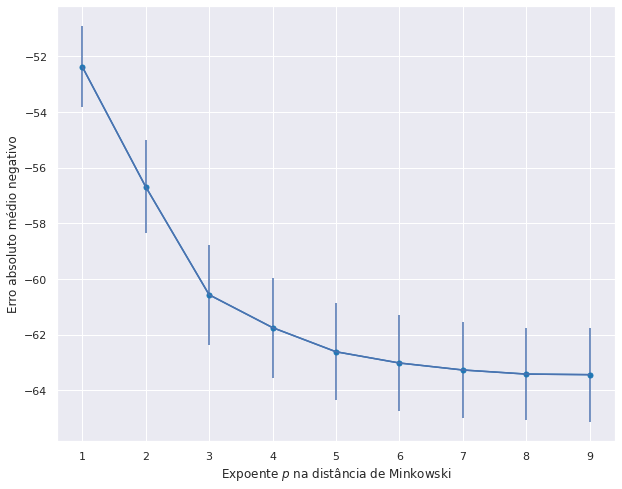

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(historic['param_p'], historic['mean_test_score'],color = "tab:blue",
         marker = '.', markersize = 10)
plt.errorbar(historic['param_p'],
            historic['mean_test_score'],
            yerr = historic['std_test_score'],
            fmt = '-')
plt.xlabel(r"Expoente $p$ na distância de Minkowski")
plt.ylabel(r"Erro absoluto médio negativo")
plt.show()

Vemos que talvez a distância manhattan seja melhor que a euclidiana, e assim, podemos fixar $p = 1$ ao invés de $p = 2$

In [ ]:
knn_p = KNeighborsRegressor(n_neighbors = 2, p = 1)
knn_p.fit(X_train_scaled, y_train)

X_test_scaled = numeric_transformer.transform(X_test)
knn_p_preds = knn_p.predict(X_test_scaled)

# score r2 e erro absoluto medio
mae_knn_p_reg = mean_absolute_error(y_test, knn_p_preds)

print(mae_knn_p_reg)
print(adjusted_r2(y_test, knn_p_preds, X_test_scaled))

48.795310701956275
0.7977979693478148


Conseguimos diminuir ainda mais o risco estimado, tendo inclusive uma melhora no $R^2$ ajustado. Ao plotarmos os valores preditos versus observados temos:

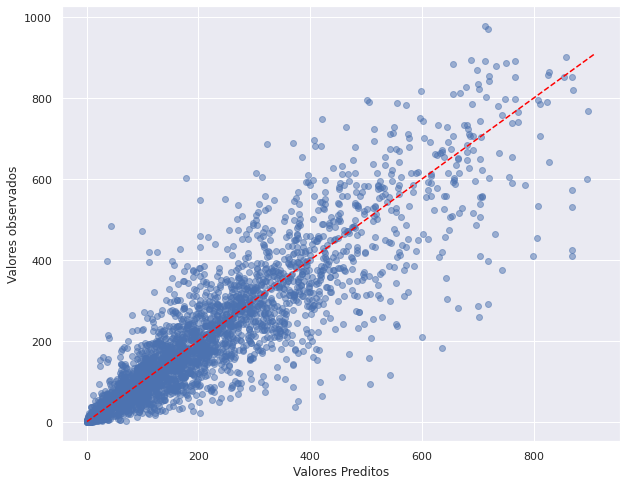

In [ ]:
# linha identidade
x_vals = np.linspace(min(knn_preds), max(knn_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(knn_p_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.show()

Ajustar: Arvore de decisão (talvez, mas é ruim para regressao), Random forest, SVM, Boosting e Rede neural (não focar tanto).




*   Árvore de regressão







*   Random Forest

*   List item

*   List item